*Разбор данного раздела:* https://youtu.be/K-_syiRiUNE?t=24

In [ ]:
# Устанавливаем пакет librosa для работы с аудио
!pip install librosa==0.8.0

     |████████████████████████████████| 184kB 5.3MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
  Created wheel for librosa: filename=librosa-0.8.0-cp36-none-any.whl size=201375 sha256=b8a42b575b330b6cf462a2403b3013d3c83da6a6fec11afff137772c8a6a3b3b
  Stored in directory: /root/.cache/pip/wheels/ee/10/1e/382bb4369e189938d5c02e06d10c651817da8d485bfd1647c9
Successfully built librosa
  Found existing installation: librosa 0.6.3
    Uninstalling librosa-0.6.3:
      Successfully uninstalled librosa-0.6.3


In [ ]:
# Подключаем библиотеки
import sklearn
from IPython.display import Audio  # Воспроизведение аудиофайлов
import time                        # Для подсчёта времени 
import zipfile                     # Для разорхивации базы
import pandas as pd                # Для работы с табличными данными
from tensorflow.keras import utils # Для to_categorical
from google.colab import files     # Загрузка файлов
import os                          # Работа с папками и файлами
import librosa                     # Параметризация аудио
import librosa.feature             # Инструменты для параметризации
import numpy as np                 # Numpy массивы
import matplotlib.pyplot as plt    # Отображение графиков

# Отрисовка графиков в ячейках collab
%matplotlib inline 
from keras.optimizers import Adam, RMSprop # Оптимизатор для задания шага обучения
from keras.models import Sequential, Model # Два формата модели keras
from keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, MaxPooling1D, Reshape, Lambda # Базовые слови
from sklearn.model_selection import train_test_split # Разбиение на обучающую и проверочную выборку
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler # Для нормировки данных
from keras.objectives import binary_crossentropy # Импортируем функцию потерь
from keras.layers.advanced_activations import LeakyReLU # Импортируем функцию активации отдельным слоем
from keras import backend as K # Устанавливаем переменную для окружения кераса


In [ ]:
# Подключаем Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Разархивируем базу
bi = zipfile.ZipFile('/content/drive/My Drive/Базы/база пения птиц. 88 классов.zip', 'r')
bi.extractall()

In [ ]:
# Подгружаем данные нашей базы
data = pd.read_csv('birdsong_metadata.csv')

In [ ]:
# Выведем данные
data.head(10)

file_id  ...                                            license
0   132608  ...  http://creativecommons.org/licenses/by-nc-sa/3.0/
1   132611  ...  http://creativecommons.org/licenses/by-nc-sa/3.0/
2    35068  ...  http://creativecommons.org/licenses/by-nc-nd/2.5/
3    82715  ...  http://creativecommons.org/licenses/by-nc-nd/2.5/
4    64685  ...  http://creativecommons.org/licenses/by-nc-nd/2.5/
5    64686  ...  http://creativecommons.org/licenses/by-nc-nd/2.5/
6   120664  ...  http://creativecommons.org/licenses/by-nc-nd/3.0/
7   120666  ...  http://creativecommons.org/licenses/by-nc-nd/3.0/
8    76767  ...  http://creativecommons.org/licenses/by-nc-nd/2.5/
9   124052  ...  http://creativecommons.org/licenses/by-nc-nd/3.0/

[10 rows x 10 columns]

In [ ]:
# Посмотрим количество уникальных ID
data['file_id'].nunique()

264

In [ ]:
# Выведем все названия птиц(колонка english_cname)
data.english_cname.unique()
bb = data.english_cname.unique()
bb

array(['Common Redpoll', 'Marsh Warbler', 'Sedge Warbler',
       'Eurasian Reed Warbler', 'Long-tailed Tit', 'Eurasian Skylark',
       'Meadow Pipit', 'Tree Pipit', 'Common Swift', 'Canada Goose',
       'Dunlin', 'European Nightjar', 'European Goldfinch',
       'Eurasian Treecreeper', 'European Greenfinch', 'Black-headed Gull',
       'Western Jackdaw', 'Rock Dove', 'Stock Dove', 'Common Wood Pigeon',
       'Northern Raven', 'Carrion Crow', 'Rook', 'Common Cuckoo',
       'Eurasian Blue Tit', 'Common House Martin',
       'Great Spotted Woodpecker', 'Black Woodpecker', 'Corn Bunting',
       'Yellowhammer', 'Common Reed Bunting', 'European Robin',
       'Common Chaffinch', 'Eurasian Coot', 'Common Snipe',
       'Common Moorhen', 'Eurasian Jay', 'Red-throated Loon',
       'Eurasian Oystercatcher', 'Barn Swallow', 'Eurasian Wryneck',
       'Willow Ptarmigan', 'European Herring Gull', 'Common Linnet',
       'River Warbler', 'Red Crossbill', 'Common Nightingale',
       'European

In [ ]:
# Создадим список названий птиц в соответствии с тем порядком, в котором они подгружаются
v=[]
for l in os.listdir(f'/content/songs/songs/'):
  songname = f'{l}'
  list(songname)
  a = int(songname[2:-5]) # Чтобы достать из названия файла только id
  for i in range(len(data['file_id'].values)):
    if a==data['file_id'].values[i]:
      v.append(i) # Составляем список id в том порядке, в котором загружаются файлы

birds1=[]
for j in v:
  birds1.append(data['english_cname'][j])

print(birds1)
print(len(birds1))

['Dunlin', 'Willow Tit', 'Common Moorhen', 'Black Woodpecker', 'Eurasian Bullfinch', 'Song Thrush', 'Eurasian Skylark', 'Northern Raven', 'Common Moorhen', 'House Sparrow', 'Northern Lapwing', 'Eurasian Treecreeper', 'Garden Warbler', 'European Turtle Dove', 'Common Pheasant', 'European Turtle Dove', 'Common Wood Pigeon', 'Common Nightingale', 'Common Whitethroat', 'Common Redstart', 'Red-throated Loon', 'Spotted Flycatcher', 'Corn Bunting', 'Willow Warbler', 'Rock Dove', 'Eurasian Oystercatcher', 'Common Linnet', 'Common Nightingale', 'Rock Dove', 'Tree Pipit', 'European Turtle Dove', 'Eurasian Coot', 'Eurasian Tree Sparrow', 'Wood Warbler', 'Common Redstart', 'Grey Partridge', 'Spotted Flycatcher', 'European Honey Buzzard', 'Common Reed Bunting', 'Eurasian Nuthatch', 'Eurasian Golden Oriole', 'Grey Plover', 'Stock Dove', 'Common Swift', 'Common House Martin', 'Canada Goose', 'Eurasian Tree Sparrow', 'Great Tit', 'European Robin', 'Common Moorhen', 'Common Cuckoo', 'Coal Tit', 'Eurasi

In [ ]:
# Прослушаем пример записи
Audio(filename='/content/songs/songs/xc132611.flac')

In [ ]:

def get_features(y, sr):

  '''
    get_features - функция параметризации данных
     y - временной ряд аудио
     sr - sampling rate(по умолчанию 22050) - частота дискретизации
  '''
  # Двумерные
  chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr) # Частота цветности
  mfcc = librosa.feature.mfcc(y=y, sr=sr)               # Мел кепстральные коэффициенты

  # Одномерные
  spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr) # Спектральный центроид
  spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)  # Ширина полосы частот
  rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)    # Спектральный спад частоты
  zcr = librosa.feature.zero_crossing_rate(y)               # Пересечения нуля

  # Возвращаем получившийся список
  return chroma_stft, mfcc, spec_cent, spec_bw, rolloff, zcr

## Вариант сети, с длиной каждого фрейма 4 секунды и шагом 1 секунда.

*Разбор данного раздела:* https://youtu.be/K-_syiRiUNE?t=475

In [ ]:
# Создаём пустые листы
X_train_1 = []
X_train_2 = []
X_train_3 = []
X_train_4 = []
X_train_5 = []
X_train_6 = []
Y_train = []

# Запоминаем время старта формирования выборки
curr_time = time.time()

i = 0
# Проходим по файлам папки
for filename in os.listdir(f'/content/songs/songs/'):
  songname = f'/content/songs/songs/{filename}'
  
  # Выделим из имени песни только число
  songnum = f'{filename}'
  list(songnum)
  a = int(songnum[2:-5])
  
# Следующая часть кода предназначена для того, чтобы присвоить каждой записи
# нужный цикл, а так как у нас по 3 записи каждой птицы и они загружаются
# вразноброс, мы делаем некую фильтрацию 264 записей по 88 классам(в соответствии
# с данными таблицы .csv)

  # Пройдемся по всем значениям столбца 'file_id' и обнаружим текущую песню
  for k in range(len(data['file_id'])):

    # Ищем строку в данных соответствующую текущей записи
    if a == data['file_id'][k]:

      # Вытаскиваем значение названия птицы для текущей записи
      w = data['english_cname'][k]

      # Проходимся циклом по нашим классам(88) и присваиваем в соответствии с записью
      for t in range(len(bb)):
        if w == bb[t]:

          # Загружаем в y аудиосигнал
          y, sr = librosa.load(songname, mono=True)

          # Превращаем сигнал в параметризованные данные и раскусываем по 4 секунды, с шагом в 1 секунду
          for p in range(0, (int(len(y)//22050))-4):
            
            chroma_stft, mfcc, spec_cent, spec_bw, rolloff, zcr = get_features(y[p*sr:(p+4)*sr], sr)

            # Добавляем строку в X_train
            X_train_1.append(chroma_stft)
            X_train_2.append(mfcc)
            X_train_3.append(spec_cent)
            X_train_4.append(spec_bw)
            X_train_5.append(rolloff)
            X_train_6.append(zcr)

            # Добавляем в Y_train номер классов в формате ohe
            Y_train.append(utils.to_categorical(t, len(bb)))

  # Выводим информацию о готовности обработки базы
  print(i, " Птица ", birds1[i], " готова -> ", round(time.time() - curr_time), "c", sep="")
  i+=1
  curr_time = time.time()

# Превращаем обучающую выборку в numpy массивы
X_train_1 = np.array(X_train_1)
X_train_2 = np.array(X_train_2)
X_train_3 = np.array(X_train_3)
X_train_4 = np.array(X_train_4)
X_train_5 = np.array(X_train_5)
X_train_6 = np.array(X_train_6)
Y_train = np.array(Y_train)

0 Птица Dunlin готова -> 6c
1 Птица Willow Tit готова -> 8c
2 Птица Common Moorhen готова -> 10c
3 Птица Black Woodpecker готова -> 2c
4 Птица Eurasian Bullfinch готова -> 7c
5 Птица Song Thrush готова -> 5c
6 Птица Eurasian Skylark готова -> 31c
7 Птица Northern Raven готова -> 17c
8 Птица Common Moorhen готова -> 1c
9 Птица House Sparrow готова -> 6c
10 Птица Northern Lapwing готова -> 4c
11 Птица Eurasian Treecreeper готова -> 1c
12 Птица Garden Warbler готова -> 12c
13 Птица European Turtle Dove готова -> 4c
14 Птица Common Pheasant готова -> 32c
15 Птица European Turtle Dove готова -> 8c
16 Птица Common Wood Pigeon готова -> 2c
17 Птица Common Nightingale готова -> 8c
18 Птица Common Whitethroat готова -> 2c
19 Птица Common Redstart готова -> 7c
20 Птица Red-throated Loon готова -> 10c
21 Птица Spotted Flycatcher готова -> 5c


/usr/local/lib/python3.6/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


22 Птица Corn Bunting готова -> 32c
23 Птица Willow Warbler готова -> 2c
24 Птица Rock Dove готова -> 0c
25 Птица Eurasian Oystercatcher готова -> 10c
26 Птица Common Linnet готова -> 13c
27 Птица Common Nightingale готова -> 32c
28 Птица Rock Dove готова -> 0c
29 Птица Tree Pipit готова -> 7c
30 Птица European Turtle Dove готова -> 3c
31 Птица Eurasian Coot готова -> 4c
32 Птица Eurasian Tree Sparrow готова -> 6c
33 Птица Wood Warbler готова -> 9c
34 Птица Common Redstart готова -> 3c
35 Птица Grey Partridge готова -> 2c
36 Птица Spotted Flycatcher готова -> 3c
37 Птица European Honey Buzzard готова -> 3c
38 Птица Common Reed Bunting готова -> 3c
39 Птица Eurasian Nuthatch готова -> 2c
40 Птица Eurasian Golden Oriole готова -> 13c
41 Птица Grey Plover готова -> 17c
42 Птица Stock Dove готова -> 14c
43 Птица Common Swift готова -> 10c
44 Птица Common House Martin готова -> 13c
45 Птица Canada Goose готова -> 2c
46 Птица Eurasian Tree Sparrow готова -> 15c
47 Птица Great Tit готова -> 7

In [ ]:
# Создаём backup обучающей выборки
X_train_backup_1 = X_train_1.copy()
X_train_backup_2 = X_train_2.copy()
X_train_backup_3 = X_train_3.copy()
X_train_backup_4 = X_train_4.copy()
X_train_backup_5 = X_train_5.copy()
X_train_backup_6 = X_train_6.copy()
Y_train_backup = Y_train.copy()

In [ ]:
X_train_1 = X_train_backup_1.copy()
X_train_2 = X_train_backup_2.copy()
X_train_3 = X_train_backup_3.copy()
X_train_4 = X_train_backup_4.copy()
X_train_5 = X_train_backup_5.copy()
X_train_6 = X_train_backup_6.copy()
Y_train = Y_train_backup.copy()

In [ ]:
# Проверяем размерность Y_train
Y_train.shape

(16540, 88)

In [ ]:
y_train_class = np.argmax(Y_train, axis=1)
print(len(y_train_class))

16540


In [ ]:
# Выводим размеры обучающей выборки
print(X_train_1.shape)
print(X_train_2.shape)
print(X_train_3.shape)
print(X_train_4.shape)
print(X_train_5.shape)
print(X_train_6.shape)
print(Y_train.shape)
print(y_train_class.shape)

(16540, 12, 173)
(16540, 20, 173)
(16540, 1, 173)
(16540, 1, 173)
(16540, 1, 173)
(16540, 1, 173)
(16540, 88)
(16540,)


In [ ]:
# Делаем reshape одномерных данных
X_train_3 = X_train_3.reshape(X_train_3.shape[0], X_train_3.shape[2], X_train_3.shape[1])
X_train_4 = X_train_4.reshape(X_train_4.shape[0], X_train_4.shape[2], X_train_4.shape[1])
X_train_5 = X_train_5.reshape(X_train_5.shape[0], X_train_5.shape[2], X_train_5.shape[1])
X_train_6 = X_train_6.reshape(X_train_6.shape[0], X_train_6.shape[2], X_train_6.shape[1])
print(X_train_1.shape)
print(X_train_2.shape)
print(X_train_3.shape)
print(X_train_4.shape)
print(X_train_5.shape)
print(X_train_6.shape)
print(Y_train.shape)
print(y_train_class.shape)

(16540, 12, 173)
(16540, 20, 173)
(16540, 173, 1)
(16540, 173, 1)
(16540, 173, 1)
(16540, 173, 1)
(16540, 88)
(16540,)


In [ ]:
def scale(X):
  '''
     scale() - функция для нормализации данных
     X - данные, которые нужно нормальзивать

  '''
  #global min_X # делаем переменные глобальными, чтобы использовать при предсказании тестового файла
  #global max_X # (используется когда тестируем свою загруженную песню)
  min_X = X.min()
  max_X = X.max()
  
  X = (X - min_X) / (max_X - min_X)

  return X

In [ ]:
# Нормализуем тренировочные данные
X_train_1_scaled = scale(X_train_1)

#Xmin1 = min_X # Запоминаем значения, чтобы потом использовать для предикта (используется когда тестируем свою загруженную песню)
#Xmax1 = max_X # Запоминаем значения, чтобы потом использовать для предикта (используется когда тестируем свою загруженную песню)

X_train_2_scaled = scale(X_train_2)

#Xmin2 = min_X # Запоминаем значения, чтобы потом использовать для предикта (используется когда тестируем свою загруженную песню)
#Xmax2 = max_X # Запоминаем значения, чтобы потом использовать для предикта (используется когда тестируем свою загруженную песню)

#X_train_3_scaled = scale(X_train_3)
#X_train_4_scaled = scale(X_train_4)
#X_train_5_scaled = scale(X_train_5)
#X_train_6_scaled = scale(X_train_6)

In [ ]:
np.random.sample(2)

array([0.68860008, 0.13279245])

In [ ]:
# Разделяем на тренировочную, проверочную и тестовую выборки
mask = np.random.sample(X_train_1.shape[0])

# Создание обучающей выборки
train_mask = mask < 0.8 

# Создание проверочной выборки
val_mask = (mask >= 0.8) & (mask < 0.999)

# Создание тестовой выборки
test_mask = (mask >= 0.999)

print(len(X_train_1_scaled[train_mask]))
print(len(X_train_1_scaled[val_mask]))
print(len(X_train_1_scaled[test_mask]))

13266
3255
19


### Простая сеть из двух параметризованных данных(частота цветности и мелкепстральные  коэффициенты) со слоями Dense, Dropout, BatchNormalization

*Разбор данного раздела:* https://youtu.be/K-_syiRiUNE?t=1357

Epoch 1/20
266/266 [==============================] - 3s 7ms/step - loss: 3.6854 - accuracy: 0.2012 - val_loss: 3.7267 - val_accuracy: 0.1745
Epoch 2/20
266/266 [==============================] - 2s 6ms/step - loss: 1.9888 - accuracy: 0.5165 - val_loss: 1.6033 - val_accuracy: 0.6264
Epoch 3/20
266/266 [==============================] - 2s 6ms/step - loss: 1.4551 - accuracy: 0.6310 - val_loss: 0.9996 - val_accuracy: 0.7604
Epoch 4/20
266/266 [==============================] - 2s 6ms/step - loss: 1.1360 - accuracy: 0.7068 - val_loss: 0.7332 - val_accuracy: 0.8347
Epoch 5/20
266/266 [==============================] - 2s 6ms/step - loss: 0.9353 - accuracy: 0.7447 - val_loss: 0.6219 - val_accuracy: 0.8461
Epoch 6/20
266/266 [==============================] - 2s 6ms/step - loss: 0.8144 - accuracy: 0.7781 - val_loss: 0.5218 - val_accuracy: 0.8725
Epoch 7/20
266/266 [==============================] - 2s 6ms/step - loss: 0.7004 - accuracy: 0.8094 - val_loss: 0.4539 - val_accuracy: 0.8842
Epoch 

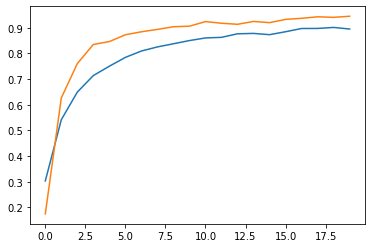

In [ ]:
# Создадим инпуты соответствующих данных
input_1 = Input((12, 173))
input_2 = Input((20, 173))

# Блок 1 "Частота цветности"
x1 = BatchNormalization()(input_1)
x1 = Flatten()(x1)

# Блок 2 "Мелкепстральные коэффициенты"
x2 = BatchNormalization()(input_2)
x2 = Flatten()(x2)

# Соединяем данные всех блоков
x = concatenate([x1, x2])

# В последнем слое 88 нейронов(по количеству классов)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = Dense(88, activation='softmax')(x)

model_simple = Model([input_1, input_2], x)

model_simple.compile(optimizer=Adam(lr=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model_simple.fit([X_train_1_scaled[train_mask], X_train_2_scaled[train_mask]],
                    Y_train[train_mask],
                    epochs=20,
                    batch_size=50,
                    validation_data=([X_train_1_scaled[val_mask], X_train_2_scaled[val_mask]],
                    Y_train[val_mask]))

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

**Функцию train_test_split при подобных задачах использовать нельзя!!!**

## Вариант сети, с длиной каждого фрейма 4 секунды и шагом 4 секунды.

*Разбор данного раздела:* https://youtu.be/K-_syiRiUNE?t=1571

In [ ]:
# Создаём пустые листы
X_train_1 = []
X_train_2 = []
X_train_3 = []
X_train_4 = []
X_train_5 = []
X_train_6 = []
Y_train = []

# Запоминаем время старта формирования выборки
curr_time = time.time()

i = 0
# Проходим по файлам папки
for filename in os.listdir(f'/content/songs/songs/'):
  songname = f'/content/songs/songs/{filename}'
  
  # Выделим из имени песни только число
  songnum = f'{filename}'
  list(songnum)
  a = int(songnum[2:-5])
  
# Следующая часть кода предназначена для того, чтобы присвоить каждой записи
# нужный цикл, а так как у нас по 3 записи каждой птицы и они загружаются
# вразноброс, мы делаем некую фильтрацию 264 записей по 88 классам(в соответствии
# с данными таблицы .csv)

  # Пройдемся по всем значениям столбца 'file_id' и обнаружим текущую песню
  for k in range(len(data['file_id'])):

    # Ищем строку в данных соответствующую текущей записи
    if a == data['file_id'][k]:

      # Вытаскиваем значение названия птицы для текущей записи
      w = data['english_cname'][k]

      # Проходимся циклом по нашим классам(88) и присваиваем в соответствии с записью
      for t in range(len(bb)):
        if w == bb[t]:

          # Загружаем в y аудиосигнал
          y, sr = librosa.load(songname, mono=True)

          # Превращаем сигнал в параметризованные данные и раскусываем по 4 секунды, с шагом в 4 секунды
          for p in range(0, (int(len(y)//22050))-4, 4):
            
            chroma_stft, mfcc, spec_cent, spec_bw, rolloff, zcr = get_features(y[p*sr:(p+4)*sr], sr)

            # Добавляем строку в X_train
            X_train_1.append(chroma_stft)
            X_train_2.append(mfcc)
            X_train_3.append(spec_cent)
            X_train_4.append(spec_bw)
            X_train_5.append(rolloff)
            X_train_6.append(zcr)

            # Добавляем в Y_train номер классов в формате ohe
            Y_train.append(utils.to_categorical(t, len(bb)))

  # Выводим информацию о готовности обработки базы
  print(i, " Птица ", birds1[i], " готова -> ", round(time.time() - curr_time), "c", sep="")
  i+=1
  curr_time = time.time()

# Превращаем обучающую выборку в numpy массивы
X_train_1 = np.array(X_train_1)
X_train_2 = np.array(X_train_2)
X_train_3 = np.array(X_train_3)
X_train_4 = np.array(X_train_4)
X_train_5 = np.array(X_train_5)
X_train_6 = np.array(X_train_6)
Y_train = np.array(Y_train)

0 Птица Dunlin готова -> 4c
1 Птица Willow Tit готова -> 5c
2 Птица Common Moorhen готова -> 6c
3 Птица Black Woodpecker готова -> 1c
4 Птица Eurasian Bullfinch готова -> 4c
5 Птица Song Thrush готова -> 3c
6 Птица Eurasian Skylark готова -> 17c
7 Птица Northern Raven готова -> 10c
8 Птица Common Moorhen готова -> 0c
9 Птица House Sparrow готова -> 4c
10 Птица Northern Lapwing готова -> 3c
11 Птица Eurasian Treecreeper готова -> 1c
12 Птица Garden Warbler готова -> 7c
13 Птица European Turtle Dove готова -> 3c
14 Птица Common Pheasant готова -> 18c
15 Птица European Turtle Dove готова -> 5c
16 Птица Common Wood Pigeon готова -> 1c
17 Птица Common Nightingale готова -> 5c
18 Птица Common Whitethroat готова -> 2c
19 Птица Common Redstart готова -> 4c
20 Птица Red-throated Loon готова -> 6c
21 Птица Spotted Flycatcher готова -> 3c


/usr/local/lib/python3.6/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


22 Птица Corn Bunting готова -> 18c
23 Птица Willow Warbler готова -> 1c
24 Птица Rock Dove готова -> 0c
25 Птица Eurasian Oystercatcher готова -> 6c
26 Птица Common Linnet готова -> 7c
27 Птица Common Nightingale готова -> 18c
28 Птица Rock Dove готова -> 0c
29 Птица Tree Pipit готова -> 4c
30 Птица European Turtle Dove готова -> 2c
31 Птица Eurasian Coot готова -> 2c
32 Птица Eurasian Tree Sparrow готова -> 4c
33 Птица Wood Warbler готова -> 5c
34 Птица Common Redstart готова -> 2c
35 Птица Grey Partridge готова -> 1c
36 Птица Spotted Flycatcher готова -> 2c
37 Птица European Honey Buzzard готова -> 2c
38 Птица Common Reed Bunting готова -> 2c
39 Птица Eurasian Nuthatch готова -> 1c
40 Птица Eurasian Golden Oriole готова -> 8c
41 Птица Grey Plover готова -> 10c
42 Птица Stock Dove готова -> 7c
43 Птица Common Swift готова -> 6c
44 Птица Common House Martin готова -> 7c
45 Птица Canada Goose готова -> 1c
46 Птица Eurasian Tree Sparrow готова -> 8c
47 Птица Great Tit готова -> 4c
48 Пт

In [ ]:
# Выводим размеры обучающей выборки
print(X_train_1.shape)
print(X_train_2.shape)
print(X_train_3.shape)
print(X_train_4.shape)
print(X_train_5.shape)
print(X_train_6.shape)
print(Y_train.shape)

(4231, 12, 173)
(4231, 20, 173)
(4231, 1, 173)
(4231, 1, 173)
(4231, 1, 173)
(4231, 1, 173)
(4231, 88)


In [ ]:
# Нормализуем тренировочные данные
X_train_1_scaled = scale(X_train_1)

#Xmin1 = min_X # Запоминаем значения, чтобы потом использовать для предикта
#Xmax1 = max_X # Запоминаем значения, чтобы потом использовать для предикта

X_train_2_scaled = scale(X_train_2)

#Xmin2 = min_X # Запоминаем значения, чтобы потом использовать для предикта
#Xmax2 = max_X # Запоминаем значения, чтобы потом использовать для предикта

In [ ]:
# Разделяем на тренировочную, проверочную и тестовую выборки
mask = np.random.sample(X_train_1.shape[0])

# Создание обучающей выборки
train_mask = mask < 0.8 

# Создание проверочной выборки
val_mask = (mask >= 0.8) & (mask < 0.999)

# Создание тестовой выборки
test_mask = (mask >= 0.999)

print(len(X_train_1_scaled[train_mask]))
print(len(X_train_1_scaled[val_mask]))
print(len(X_train_1_scaled[test_mask]))

3359
867
5


Epoch 1/30
68/68 [==============================] - 4s 11ms/step - loss: 4.4406 - accuracy: 0.0791 - val_loss: 10.3771 - val_accuracy: 0.0531
Epoch 2/30
68/68 [==============================] - 0s 6ms/step - loss: 3.1909 - accuracy: 0.2839 - val_loss: 8.8181 - val_accuracy: 0.0773
Epoch 3/30
68/68 [==============================] - 0s 6ms/step - loss: 2.6287 - accuracy: 0.3849 - val_loss: 5.3894 - val_accuracy: 0.0946
Epoch 4/30
68/68 [==============================] - 0s 6ms/step - loss: 2.1883 - accuracy: 0.5028 - val_loss: 4.1432 - val_accuracy: 0.1430
Epoch 5/30
68/68 [==============================] - 0s 6ms/step - loss: 1.9514 - accuracy: 0.5531 - val_loss: 3.4209 - val_accuracy: 0.2307
Epoch 6/30
68/68 [==============================] - 0s 6ms/step - loss: 1.6793 - accuracy: 0.6027 - val_loss: 2.7084 - val_accuracy: 0.3483
Epoch 7/30
68/68 [==============================] - 0s 6ms/step - loss: 1.4579 - accuracy: 0.6397 - val_loss: 2.2832 - val_accuracy: 0.4325
Epoch 8/30
68/68 [

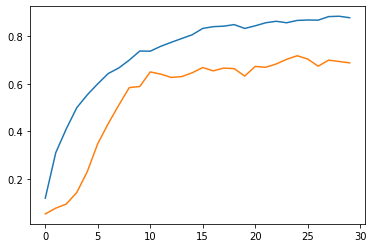

In [ ]:
# Создадим инпуты соответствующих данных
input_1 = Input((12, 173))
input_2 = Input((20, 173))

# Блок 1 "Частота цветности"
x1 = BatchNormalization()(input_1)
x1 = Flatten()(x1)

# Блок 2 "Мелкепстральные коэффициенты"
x2 = BatchNormalization()(input_2)
x2 = Flatten()(x2)

# Соединяем данные всех блоков
x = concatenate([x1, x2])

# В последнем слое 88 нейронов(по количеству классов)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = Dense(88, activation='softmax')(x)

model_simple = Model([input_1, input_2], x)

model_simple.compile(optimizer=Adam(lr=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model_simple.fit([X_train_1_scaled[train_mask], X_train_2_scaled[train_mask]],
                    Y_train[train_mask],
                    epochs=30,
                    batch_size=50,
                    validation_data=([X_train_1_scaled[val_mask], X_train_2_scaled[val_mask]],
                    Y_train[val_mask]))

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

# Предсказание тестовой выборки

*Разбор данного раздела:* https://youtu.be/K-_syiRiUNE?t=1738

In [ ]:
# Делаем предикт тестовой выборки
y = model_simple.predict([X_train_1_scaled[test_mask],X_train_2_scaled[test_mask]])

In [ ]:
# Выводим выход с softmax
# И распознанный класс
print(np.argmax(y, axis=1))
# Проверяем правильный индекс списка с
print(np.argmax(Y_train[test_mask], axis=1))

[43 31 35 40 77]
[43 31 35 40 77]
